In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [62]:
def expand_sparse_self_energy(sigma_small, index_active, target_size,
                              target_range):
    """
    Expand a sparse self-energy matrix to a dense matrix of size (target_size, target_size),
    inserting values only at the positions that lie within target_range.

    Parameters
    ----------
    sigma_small : np.ndarray
        (n_active, n_active) self-energy matrix in the active subspace.
    index_active : np.ndarray
        Indices in the full space where the active orbitals reside.
    target_size : int
        Size of the expanded self-energy matrix (typically a lead block size).
    target_range : tuple
        (start, end) range in full space corresponding to the lead region.

    Returns
    -------
    sigma_expanded : np.ndarray
        (target_size, target_size) full-sized self-energy with values inserted at appropriate indices.
    """
    start, end = target_range
    sigma_expanded = np.zeros((target_size, target_size), dtype=complex)

    # Map global indices to local within the lead block
    local_indices = np.array(
        [i - start for i in index_active if start <= i < end])
    if len(local_indices) == 0:
        raise ValueError("No active orbitals found in the target range.")

    for i_new, i_old in enumerate(local_indices):
        for j_new, j_old in enumerate(local_indices):
            sigma_expanded[local_indices[i_new],
                           local_indices[j_new]] = sigma_small[i_new, j_new]

    return sigma_expanded


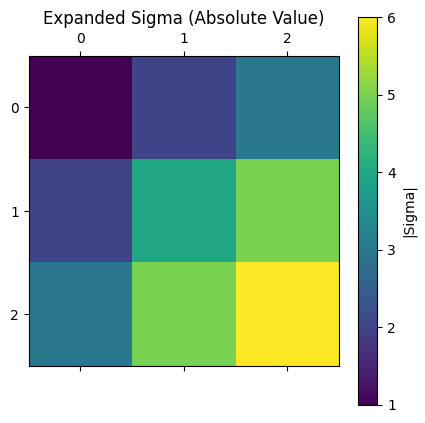

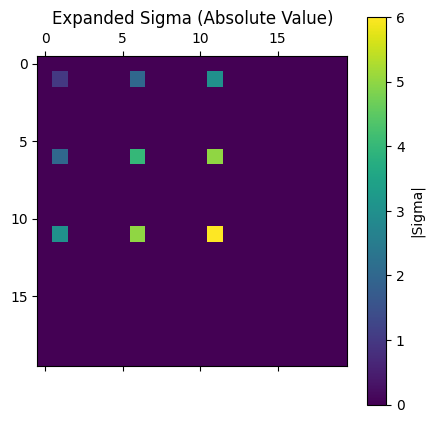

In [63]:
# Create a small sigma_small for testing
sigma_small = np.array([
    [1+0j, 2+0j, 3+0j],
    [2+0j, 4+0j, 5+0j],
    [3+0j, 5+0j, 6+0j]
])

# Define full index_active list
index_active_region = np.array([1,6,11])

target_range = (0, 20)
target_size = target_range[1] - target_range[0]

sigma_expanded = expand_sparse_self_energy(
    sigma_small=sigma_small,
    index_active=index_active_region,
    target_size=target_size,
    target_range=target_range
)

# Visualization
plt.figure(figsize=(5,5))
plt.matshow(np.abs(sigma_small), fignum=1)
plt.colorbar(label="|Sigma|")
plt.title("Expanded Sigma (Absolute Value)")
plt.show()
plt.figure(figsize=(5,5))
plt.matshow(np.abs(sigma_expanded), fignum=1)
plt.colorbar(label="|Sigma|")
plt.title("Expanded Sigma (Absolute Value)")
plt.show()

In [64]:
data_folder = "./output/no_lowdin/device"
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
nodes = np.load(f"{data_folder}/nodes.npy")
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
print("self_energy_shape",self_energy[0].shape)
print("nodes",nodes)
print("index active region", index_active_region)


self_energy_shape (648, 648)
nodes [    0  3888  6736 10624]
index active region [    3    12    21 ... 10600 10609 10618]


In [65]:
se = self_energy[0].retarded(0).real

KeyboardInterrupt: 

/tmp/ipykernel_524826/1991721947.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


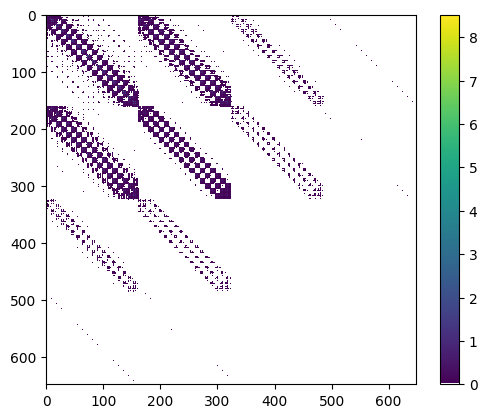

In [40]:
cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]  # Set the minimum color to white (RGBA)

new_cmap = ListedColormap(new_colors)

# Plot
plt.imshow(np.abs(se), cmap=new_cmap)
plt.colorbar()
plt.show()


In [57]:
sigma_left = expand_sparse_self_energy(
    sigma_small=se,
    index_active=index_active_region,
    target_size=nodes[1] - nodes[0],
    target_range=(nodes[0], nodes[1])
)

# sigma_right = expand_sparse_self_energy(
#     sigma_small=self_energy[1].Sigma,
#     index_active=index_active_region,
#     target_size=nodes[3] - nodes[2],
#     target_range=(nodes[2], nodes[3])
# )


0 3888
local incdice [   3   12   21   30   39   48   57   66   75   84   93  102  111  120
  129  138  147  156  165  174  183  192  201  210  219  228  237  246
  255  264  273  282  291  300  309  318  327  336  345  354  363  372
  381  390  399  408  417  426  435  444  453  462  471  480  489  498
  507  516  525  534  543  552  561  570  579  588  597  606  615  624
  633  642  651  660  669  678  687  696  705  714  723  732  741  750
  759  768  777  786  795  804  813  822  831  840  849  858  867  876
  885  894  903  912  921  930  939  948  957  966  975  984  993 1002
 1011 1020 1029 1038 1047 1056 1065 1074 1083 1092 1101 1110 1119 1128
 1137 1146 1155 1164 1173 1182 1191 1200 1209 1218 1227 1236 1245 1254
 1263 1272 1281 1290 1299 1308 1317 1326 1335 1344 1353 1362 1371 1380
 1389 1398 1407 1416 1425 1434 1443 1452 1461 1470 1479 1488 1497 1506
 1515 1524 1533 1542 1551 1560 1569 1578 1587 1596 1605 1614 1623 1632
 1641 1650 1659 1668 1677 1686 1695 1704 1713 1722 1731 

/tmp/ipykernel_524826/1553613078.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', 256)


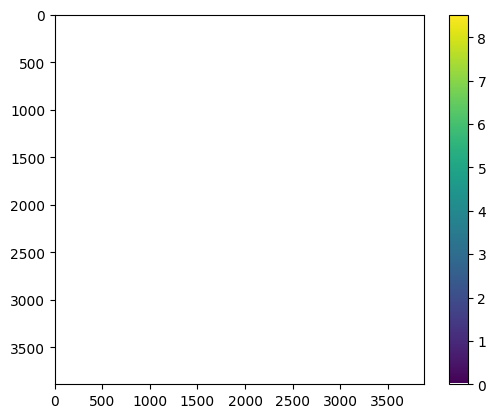

In [42]:
cmap = cm.get_cmap('viridis', 256)
new_colors = cmap(np.linspace(0, 1, 256))
new_colors[0] = [1, 1, 1, 1]  # Set the minimum color to white (RGBA)

new_cmap = ListedColormap(new_colors)

# Plot
plt.imshow(np.abs(sigma_left), cmap=new_cmap)
plt.colorbar()
plt.show()
